<a href="https://colab.research.google.com/github/allanspadini/livro-val-allan/blob/main/capitulo7/capitulo_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capítulo 7 - Hiperparâmetros**

In [2]:
param_grid = {'changepoint_prior_scale': [0.001,0.01,0.1,0.5],                 
              'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],                                          
              'seasonality_mode': ['additive','multiplicative']}

In [ ]:
import itertools

In [ ]:
all_params = [dict(zip(param_grid.keys(), value))
              for value in itertools.product(
                                  *param_grid.values())]
mse_values= []

In [ ]:
for params in all_params:
    modelo = Prophet(**params).fit(df_sem_outliers)
    df_cv = cross_validation(modelo, initial='7300 days', period='1825 days', 
                             horizon = '3650 days', parallel='processes')
                             
    df_p = performance_metrics(df_cv, rolling_window=1)
    mse_values.append(df_p['mse'].values[0])


In [ ]:
results = pd.DataFrame(all_params)
results['mse'] = mse_values
results

In [ ]:
import numpy as np

In [ ]:
best_params = all_params[np.argmin(mse_values)]
print(best_params)

Rodando a previsão com os `best_params`: 

In [ ]:
modelo = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=0.1, seasonality_mode='additive') 
modelo.fit(df_sem_outliers)
dataframefuturo = modelo.make_future_dataframe(periods=300, freq = 'M')
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



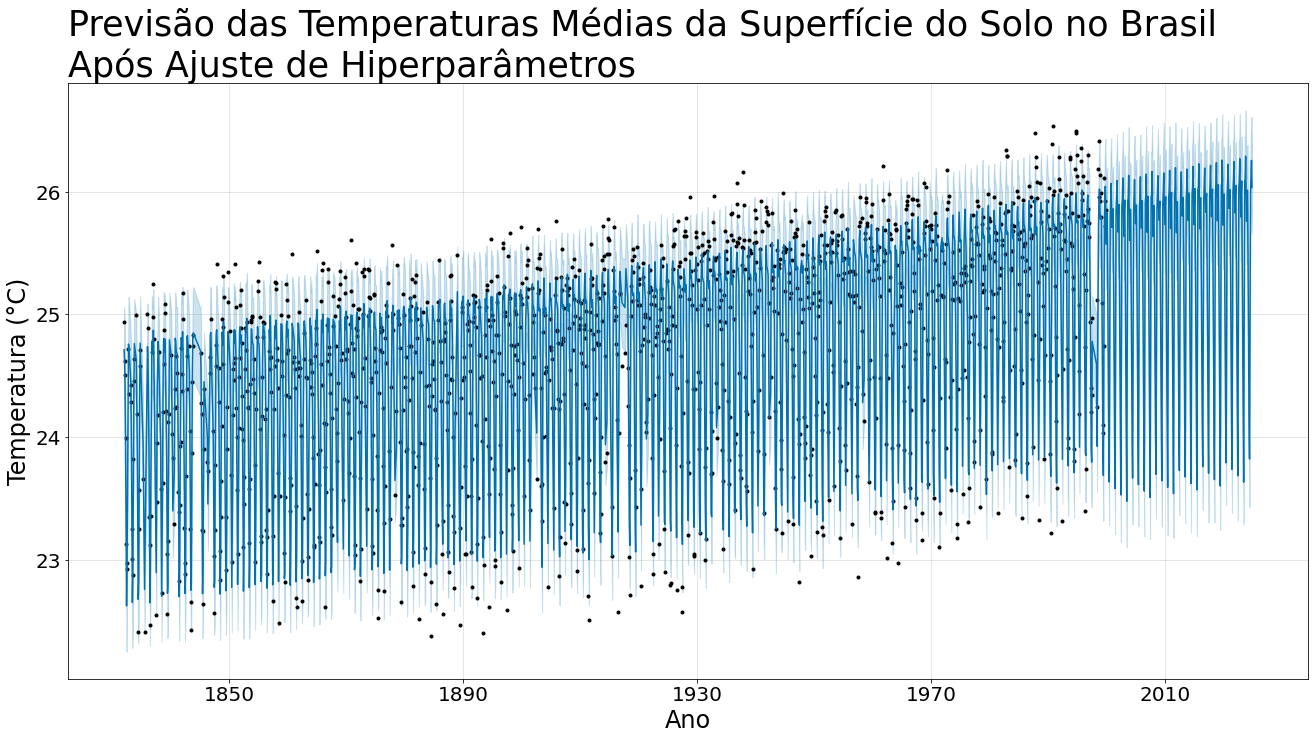

In [ ]:
modelo.plot(previsao, figsize=(18,9));
ax = fig.add_subplot()
plt.title('Previsão das Temperaturas Médias da Superfície do Solo no Brasil \nApós Ajuste de Hiperparâmetros', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

## Salvando o modelo:

In [ ]:
import json

In [ ]:
from prophet.serialize import model_to_json
from prophet.serialize import model_from_json

In [ ]:
with open('climate_change_br.json', 'w') as file_out:
    json.dump(model_to_json(modelo), file_out)

## Carregando o modelo:

In [ ]:
with open('climate_change_br.json', 'r') as file_in:
    modelo = model_from_json(json.load(file_in))

In [ ]:
previsao = modelo.predict
modelo.plot(previsao)